## 1. Decision Trees and Naive bayes

## 2. Decision Tree Evaluation:
### Breast-cancer dataset:
In this data set I trained the breast cancer dataset and made classification by decision tree method. Then evaluate the method by ROC-AUC method.

Then in order to do more practice, I checked Naive Bayes classification for this data.

Finally I plot the results by DecisionBoundaryDisplay to have better visualization

Try to understand the dataset globally.

Load the data.

Exploratory analysis

Preprocess data (skewness, normality, etc.)

Modeling (cross-validation and training)

Evaluation

Explanation

In [1]:
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

In [2]:
# Read the data file
data = pd.read_csv('../data/breast-cancer.csv')
print (data.shape)
data.head(5)

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
#check balans in perentage using value_counts and normalize =True
data.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [5]:
# clean data
data = data.drop('id',axis=1) # To prepare the data for correlation
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [6]:
float_columns = [x for x in data.columns if x not in ['diagnosis']]

In [7]:
# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,0.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,0.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,0.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,0.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,0.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,0.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [8]:
# see with features are highly correlated
# Pairwise maximal correlations
corr_mat.abs().idxmax()

radius_mean                         perimeter_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                             symmetry_se
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                fractal_dimension_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                          symmetry_mean
fractal_dimension_se           

In [9]:
# how much are they correlated? Can we eliminate certain features based on high correlations
corr_mat.abs().max()

radius_mean                0.997855
texture_mean               0.912045
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.805324
compactness_mean           0.883121
concavity_mean             0.921391
concave points_mean        0.921391
symmetry_mean              0.699826
fractal_dimension_mean     0.767297
radius_se                  0.972794
texture_se                 0.411621
perimeter_se               0.972794
area_se                    0.951830
smoothness_se              0.427374
compactness_se             0.803269
concavity_se               0.801268
concave points_se          0.771804
symmetry_se                0.449137
fractal_dimension_se       0.803269
radius_worst               0.993708
texture_worst              0.912045
perimeter_worst            0.993708
area_worst                 0.984015
smoothness_worst           0.805324
compactness_worst          0.892261
concavity_worst            0.892261
concave points_worst       0

In [10]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

In [11]:
import numpy as np
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,2.217515,...,1.764045,-1.359293,2.022158,1.794344,1.307686,2.479386,2.003224,2.296076,2.682614,1.939736
1,1,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,0.001392,...,1.706795,-0.369203,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.087084,-0.228740,0.292501
2,1,1.524183,0.456187,1.509470,1.511457,0.942210,1.076890,1.393265,2.021815,0.939685,...,1.490832,-0.023974,1.362620,1.493444,0.527407,1.146233,0.929353,1.955000,1.177854,0.211979
3,1,-0.774335,0.253732,-0.550424,-0.843470,3.283553,3.256221,1.908415,1.460738,2.867383,...,-0.179580,0.133984,-0.130272,-0.494860,3.394275,3.449402,1.907919,2.175786,5.487455,4.813255


In [13]:
# Modeling
y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

In [14]:
from sklearn.model_selection import train_test_split

y_train, y_test,X_train, X_test = train_test_split(y,X, test_size = 0.2)

In [15]:
#modelling based on Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

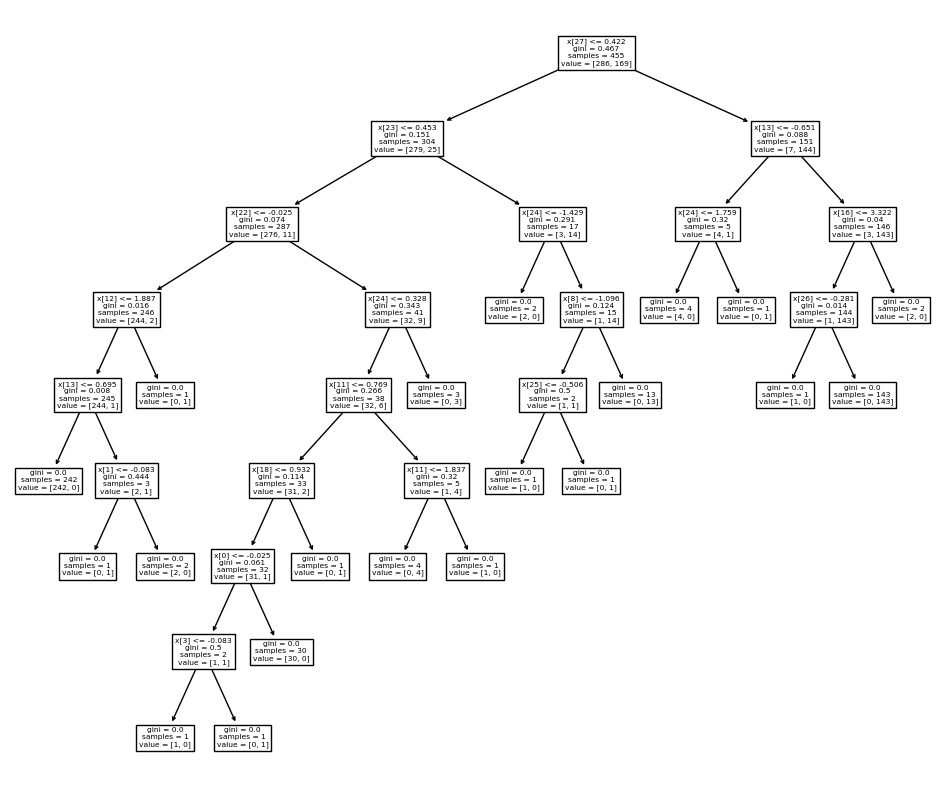

In [16]:
plt.figure(figsize=(12, 10))
tree.plot_tree(clf)
plt.show()

In [17]:
features = list(X.columns)
target = ['diagnosis']

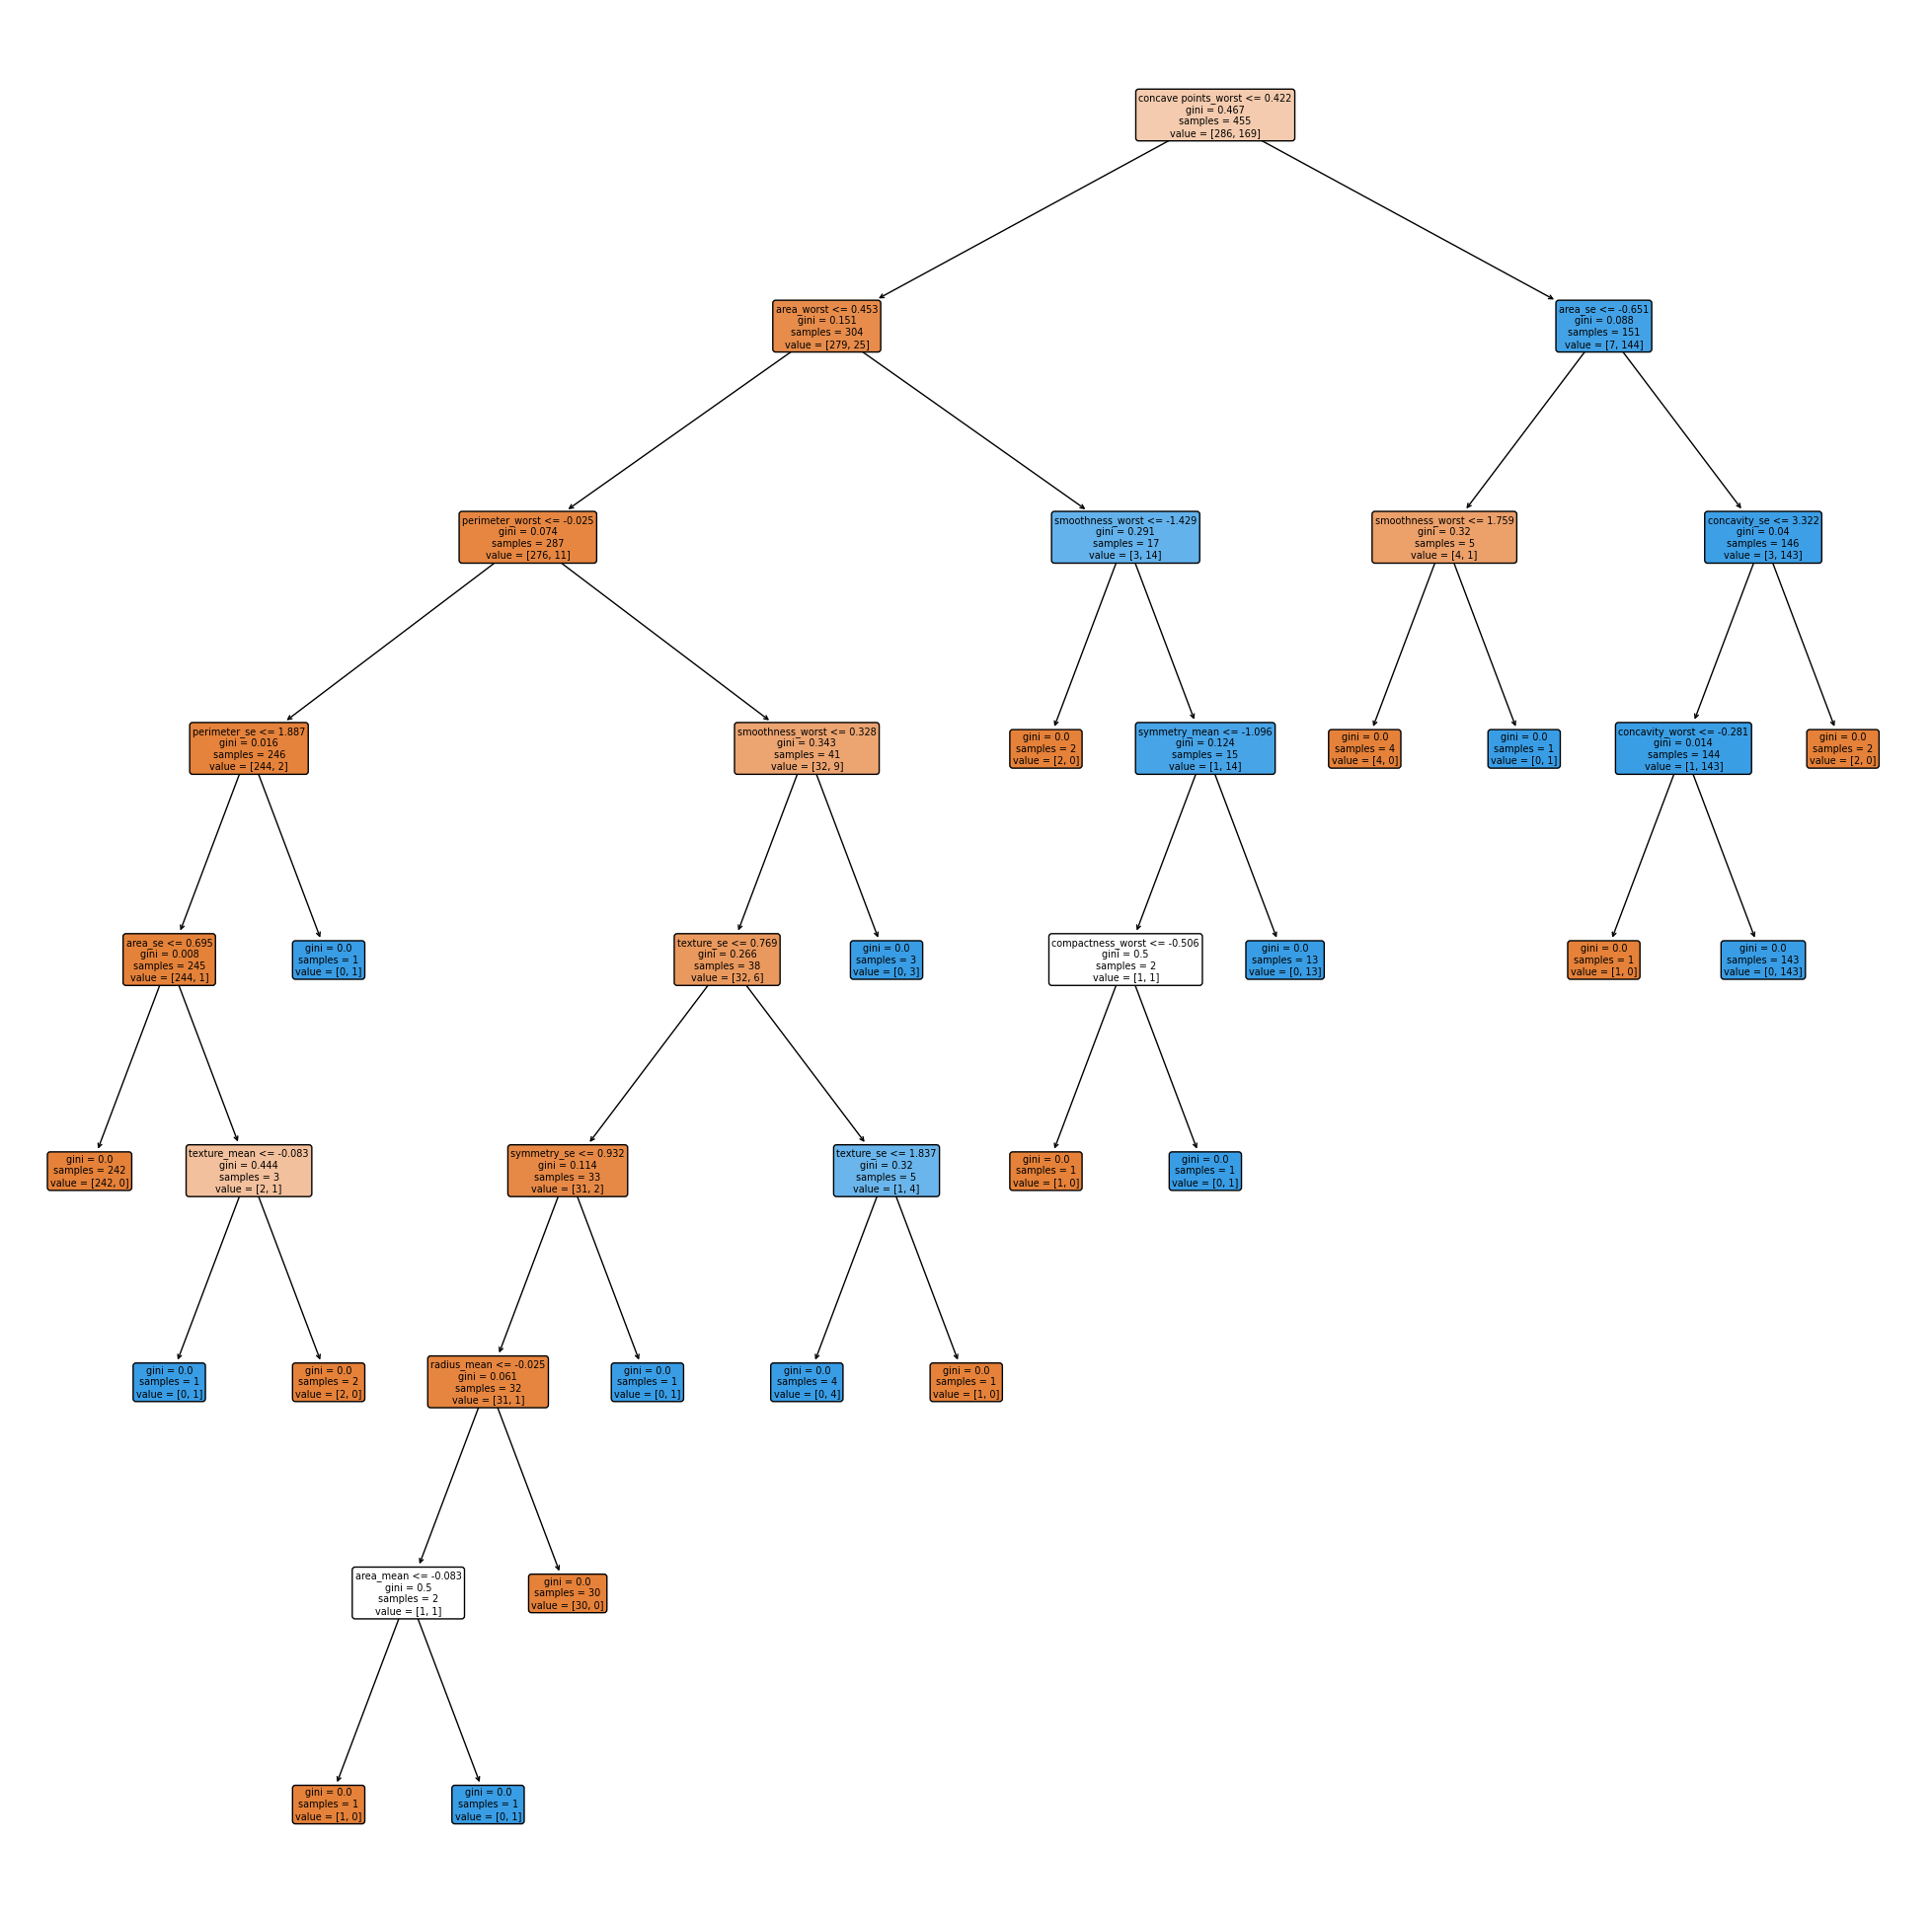

In [18]:
plt.figure(figsize=(25,25))
tree.plot_tree(
    clf, 
    feature_names=features, 
    filled=True,
    rounded=True,
)
plt.show()

## Evaluation:

In [19]:
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [20]:
#modelling based on Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [21]:
#modelling based on Naive Bayes  GaussianNB
clf_1 = GaussianNB()
clf_1 = clf_1.fit(X_train,y_train)
y_pred_1 = clf_1.predict(X_test)

In [22]:
#modelling based on Naive Bayes BernoulliNB
clf_2 = BernoulliNB()
clf_2 = clf_2.fit(X_train,y_train)
y_pred_2 = clf_2.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

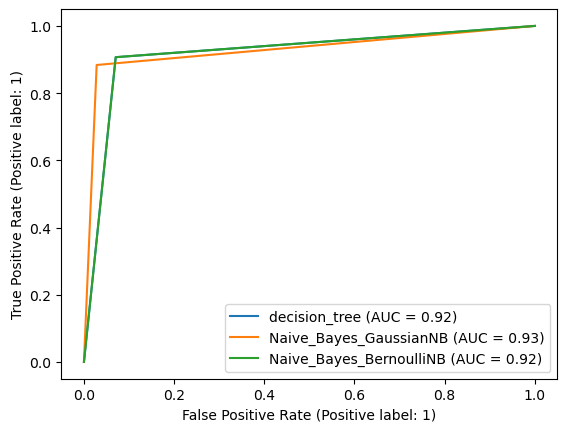

In [23]:
# Create a single plot
fig, ax = plt.subplots()

# Plot the ROC curve for logistic regression
tree_display = RocCurveDisplay.from_predictions(y_test, y_pred, name='decision_tree', ax=ax)

# Plot the ROC curve for SVM-rbf
naive_display = RocCurveDisplay.from_predictions(y_test, y_pred_1, name='Naive_Bayes_GaussianNB', ax=ax)

# Plot the ROC curve for SVM-rbf
naive_display = RocCurveDisplay.from_predictions(y_test, y_pred_2, name='Naive_Bayes_BernoulliNB', ax=ax)

plt.show

### Explanation: 
The value of AUC in both methods are almost the same! But, the Naive Bayes od GaussianNB classifier method indicates a bit more accurate than other methods.

### Compare different methods with visualization:

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay 

from matplotlib.colors import ListedColormap

In [25]:
# PCA on X
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Step 3: Get the principal components
principal_components = pca.components_

# Step 4: Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 5: Transform the data to the reduced-dimensional space
reduced_data = pca.transform(data_scaled)

In [26]:
reduced_data.shape

(569, 30)

In [27]:
feature_1 = reduced_data[:,0]
feature_2 = reduced_data[:,1]
new_X = np.column_stack((feature_1, feature_2))

In [28]:
from sklearn.model_selection import train_test_split

y_train_pca, y_test_pca,X_train_pca, X_test_pca = train_test_split(y,new_X, test_size = 0.2)

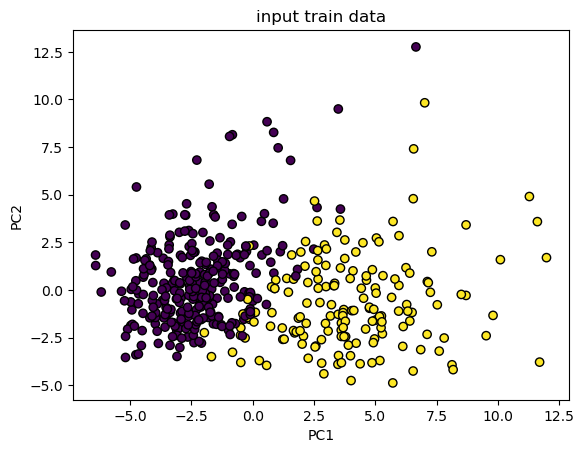

In [29]:
# plot training points
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=y_train_pca, edgecolors='k')
plt.title('input train data')
plt.xlabel("PC1")
plt.ylabel('PC2')
plt.show()

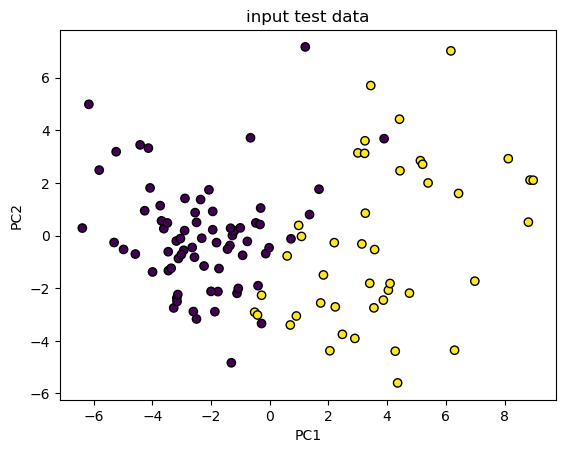

In [30]:
# plot testing points
plt.scatter(X_test_pca[:,0],X_test_pca[:,1], c=y_test_pca, edgecolors="k")
plt.title('input test data')
plt.xlabel("PC1")
plt.ylabel('PC2')
plt.show()

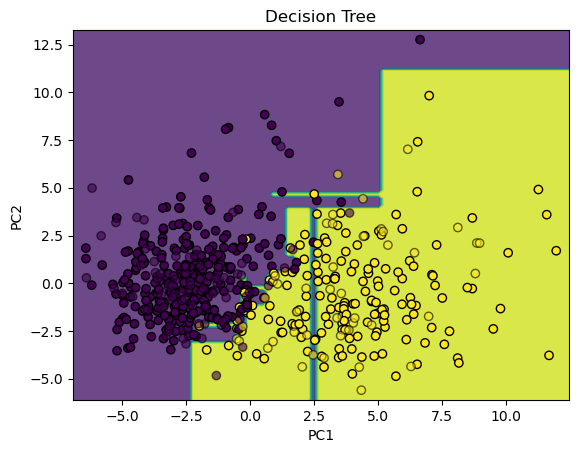

In [31]:
# plot tresholdes with Decision Tree Classifier

# modelling
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_pca,y_train_pca)

# make pipeline to make it easier
clf = make_pipeline(StandardScaler(), clf)
clf.fit(X_train_pca, y_train_pca)
score = clf.score(X_test_pca, y_test_pca)

#Plot decision boundary
DecisionBoundaryDisplay.from_estimator(clf, new_X, alpha=0.8, eps=0.5)

# plot training points
plt.scatter(
            X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, edgecolors="k"
        )
    
# plot testing points
plt.scatter(
            X_test_pca[:, 0],
            X_test_pca[:, 1],
            c=y_test_pca,
            edgecolors="k",
            alpha=0.6,
        )
plt.title('Decision Tree')
plt.xlabel("PC1")
plt.ylabel('PC2')
plt.show()

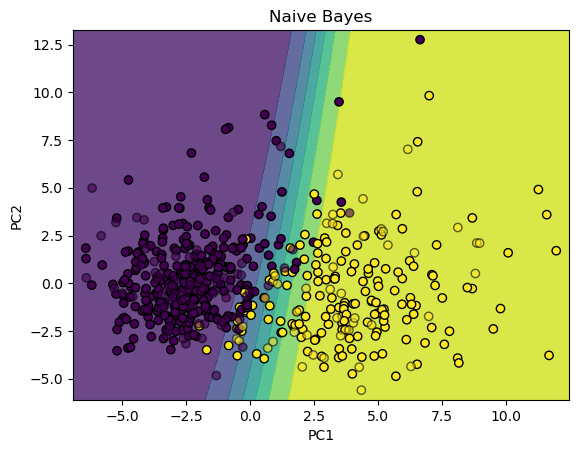

In [32]:
# plot tresholdes with Naive Bayes Classifier
# modelling
clf = GaussianNB()
clf = clf.fit(X_train_pca,y_train_pca)

# make pipeline to make it easier
clf = make_pipeline(StandardScaler(), clf)
clf.fit(X_train_pca, y_train_pca)
score = clf.score(X_test_pca, y_test_pca)

#Plot decision boundary
DecisionBoundaryDisplay.from_estimator(clf, new_X, alpha=0.8, eps=0.5)

# plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train_pca, edgecolors="k")

# plot testing points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test_pca, edgecolors="k", alpha=0.6)
plt.title('Naive Bayes')
plt.xlabel("PC1")
plt.ylabel('PC2')
plt.show()

### Conclusion:
Since the plots with boundary shows, the Gaussian classification method has better classification than the tree decision classification. 


## 3. Naive Bayes
### Corona pandemic data set

The column 'Roommate' in a classification procedure is not useful because it does not provide any relevant information for predicting the test results. The 'Roommate' column contains categorical values that represent the unique identifiers for each roommate, which do not have any direct relationship with the symptoms or test results.

In [33]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

In [34]:
# Create data frame
data = {
    'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
    'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'],
    'headache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'],
    'test result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

df = pd.DataFrame(data)

In [35]:
df

,shivers,running nose,headache,test result
0,Y,N,No,Negative
1,N,N,Mild,Negative
2,Y,Y,No,Positive
3,N,Y,No,Negative
4,N,N,Heavy,Positive
5,Y,N,No,Negative
6,Y,Y,Mild,Positive


In [36]:
# Transform the categorical data into numerical values
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

In [37]:
# Split the data into features (X) and the target variable (y)
X = df_encoded.drop('test result', axis=1)
y = df_encoded['test result']

In [38]:
# Train the Categorical Naive Bayes classifier
clf = CategoricalNB()
clf.fit(X, y)

CategoricalNB()

In [39]:
# To manually calculate the prediction probability for observation number 5
observation_5 = X.iloc[4]
prediction_probs = clf.predict_proba([observation_5])

C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [40]:
# To compare the prediction probabilities for the Negative and Positive classes
negative_prob = prediction_probs[0][0]
positive_prob = prediction_probs[0][1]

print("Negative probability:", negative_prob)
print("Positive probability:", positive_prob)

Negative probability: 0.5434782608695651
Positive probability: 0.45652173913043476


### Conclusion:
The output will show the probability of the Negative class and the Positive class. In this case, the Negative class has a higher probability than the Positive class, indicating that the prediction for observation number 5 is indeed higher for the Negative class.